In [5]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
import tensorflow as tf
from document_utils import *


In [12]:
x_train = load_x_train()
x_test = load_x_test()
y_train = load_y_train()
y_test = load_y_test()

# Prints dataset shapes
verify_all_datasets()

modelLoad = tf.keras.models.load_model('model/main.keras')


x_train shape: (20000, 784)

y_train shape: (20000, 1)

x_test shape: (20000, 784)

y_test shape: (20000, 1)


In [7]:
# mean absolute error for test and training sets

decisionTree = tree.DecisionTreeClassifier()
scores_test = cross_val_score(decisionTree, x_test, y_test, cv=8)
print(scores_test)
print(scores_test.mean())


scores_train = cross_val_score(decisionTree, x_train, y_train, cv=8)
print(scores_train)

print(scores_train.mean())

err_cv = abs(scores_test.mean())

[0.58 0.53 0.58 0.56 0.57 0.6  0.6  0.58]
0.5745
[0.74 0.75 0.73 0.74 0.76 0.74 0.72 0.73]
0.73865


In [13]:
# Percentage
# Format -> Loss, Accuracy

modelLoad.evaluate(x_train, y_train), modelLoad.evaluate(x_test, y_test)

625/625 [==============================] - 1s 819us/step - loss: 0.3360 - accuracy: 0.9459


([0.3483787477016449, 0.9427000284194946],
 [0.3360329568386078, 0.9458500146865845])

1/1 [==============================] - 0s 15ms/step


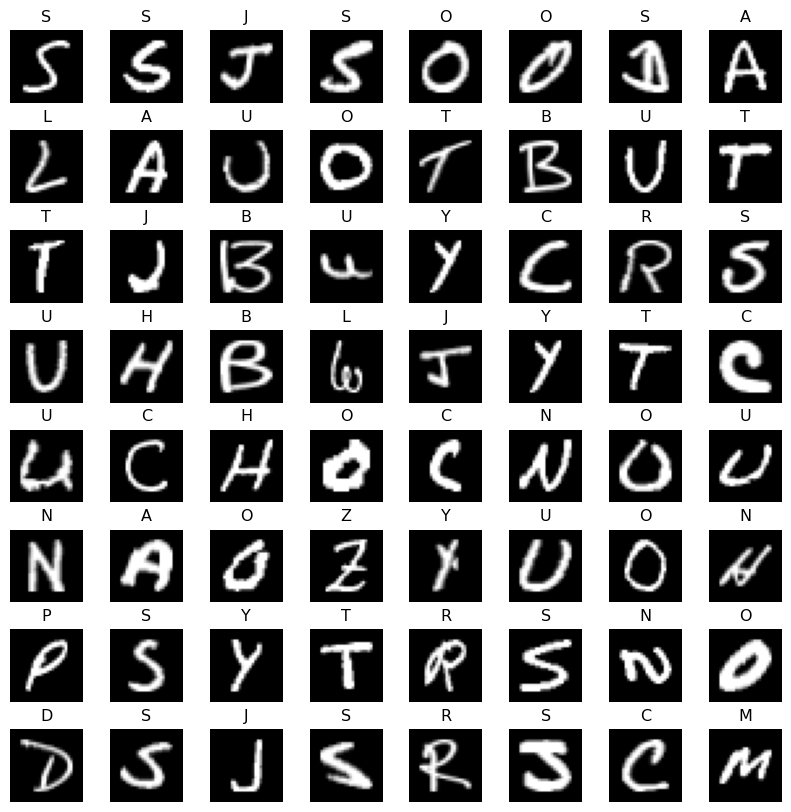

In [11]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

test = np.reshape(x_test.values, (x_test.shape[0], 28,28)) # To display as image

m,n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)


# Labels are Predictions from the model.
for i,ax in enumerate(axes.flat):

    i = np.random.randint(m)

    ax.imshow(test[i], cmap='gray')
    
    predict = modelLoad.predict(test[i].reshape(1,784)) # reshapes into 1D flattened images
    
    ax.set_title(alphabets[np.argmax(predict)])
    ax.set_axis_off()
    